In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/Dissertation

/content/drive/My Drive/Colab Notebooks/Dissertation


In [4]:
def get_house_path(house):
    return f'data/ukdale-parsed-chunks/house_{house}/'
    
def get_chunk_path(house, chunk):
    return get_house_path(house) + f'chunk_{chunk}.dat'

def get_num_chunks(house):
    return len(glob.glob(get_house_path(house) + 'chunk_*[0-9].dat'))

def read_file(house, chunk, labels):
    file = get_chunk_path(house, chunk)
    print(f'reading file {file}; for house {house} and chunk {chunk}');
    
    dtypes = {}
    for label in labels[house]:
        dtypes[label] = 'float32'
    df = pd.read_table(file, sep = '\t', header=0, names = labels[house], 
                                       dtype = dtypes) 

    return df

In [5]:
def parse_data(df):
    df['timestamp'] = df['unix_time'].astype("datetime64[s]")
    df.set_index(df['timestamp'].values, inplace=True)
    df.drop(['unix_time'], axis=1, inplace=True)

    df['timeslice'] = df.timestamp.dt.hour

    return df

In [6]:
def read_labels():
    labels = {}
    for house in range(1, 2):
        fileName = get_chunk_path(house, 1)
        house_labels = pd.read_csv(fileName, sep = '\t', nrows=1).columns.tolist()
        labels[house] = house_labels
    return labels

In [7]:
def get_house_data_generator(house):
    labels = read_labels()
    num_chunks = get_num_chunks(house)
    for i in range(1, num_chunks + 1):
        if int(i) == 1:
            print(f'reading house {house}; chunk 1');

        df = read_file(house, i, labels)
        df = parse_data(df)
        
        print(f'read house {house}; chunk {i}; df.shape is {df.shape}')
    
        yield df

In [8]:
def get_merged_chunks(house, num_chunks):
    max_num_chunks = get_num_chunks(house)
    num_chunks = max_num_chunks if num_chunks > max_num_chunks else num_chunks
    house_gen = get_house_data_generator(house)
    data = [next(house_gen) for i in range(num_chunks)]

    return pd.concat(data)


In [9]:
def get_all_data_generators():
    gen = {}
    for house in range(1,2):
        gen[house] = get_house_data_generator(house)
        
    return gen

In [10]:
labels = read_labels()
for house in range(1,2):
    print('House {}: '.format(house), labels[house], '\n')

House 1:  ['mains_active', 'mains_apparent', 'mains_rms', 'aggregate_apparent', 'ft_boiler', 'ft_solar_thermal_pump', 'ft_washing_machine', 'ft_dishwasher', 'ft_tv', 'ft_kitchen_lights', 'ft_htpc', 'ft_kettle', 'ft_toaster', 'ft_fridge', 'ft_microwave', 'ft_amp_livingroom', 'ft_adsl_router', 'ft_livingroom_s_lamp', 'ft_lighting_circuit', 'ft_subwoofer_livingroom', 'ft_livingroom_lamp_tv', 'ft_kitchen_phone&stereo', 'ft_coffee_machine', 'ft_gas_oven', 'ft_data_logger_pc', 'ft_office_lamp2', 'aggregate_active', 'unix_time'] 



In [11]:
# gen = get_all_data_generators()

In [12]:
# house_gen = get_house_data_generator(1)

In [13]:
def print_heads_tails(df, h=True,t=True):
    print(f'House {house}, data has shape: {df.shape}')
    if h:
        display(df.head(2))

    print()

    if t:
        display(df.tail(2))

In [14]:
ref_chunk_df = get_merged_chunks(1, 2)
print_heads_tails(ref_chunk_df)

reading house 1; chunk 1
reading file data/ukdale-parsed-chunks/house_1/chunk_1.dat; for house 1 and chunk 1
read house 1; chunk 1; df.shape is (4500000, 29)
reading file data/ukdale-parsed-chunks/house_1/chunk_2.dat; for house 1 and chunk 2
read house 1; chunk 2; df.shape is (4500000, 29)
House 1, data has shape: (9000000, 29)


,mains_active,mains_apparent,mains_rms,aggregate_apparent,ft_boiler,ft_solar_thermal_pump,ft_washing_machine,ft_dishwasher,ft_tv,ft_kitchen_lights,...,ft_subwoofer_livingroom,ft_livingroom_lamp_tv,ft_kitchen_phone&stereo,ft_coffee_machine,ft_gas_oven,ft_data_logger_pc,ft_office_lamp2,aggregate_active,timestamp,timeslice
2013-04-11 19:09:52,630.289978,683.140015,242.539993,675.0,0.00000,0.0,0.0,1.0,97.0,0.0,...,16.0,0.0,1.0,1.0,46.0,12.0,0.0,622.779724,2013-04-11 19:09:52,19
2013-04-11 19:09:52,628.349976,681.590027,242.759995,679.0,11.07164,0.0,0.0,1.0,96.0,0.0,...,16.0,0.0,1.0,1.0,46.0,13.0,10.0,626.470276,2013-04-11 19:09:52,19


,mains_active,mains_apparent,mains_rms,aggregate_apparent,ft_boiler,ft_solar_thermal_pump,ft_washing_machine,ft_dishwasher,ft_tv,ft_kitchen_lights,...,ft_subwoofer_livingroom,ft_livingroom_lamp_tv,ft_kitchen_phone&stereo,ft_coffee_machine,ft_gas_oven,ft_data_logger_pc,ft_office_lamp2,aggregate_active,timestamp,timeslice
2014-12-27 19:09:52,211.339996,242.380005,243.029999,238.0,11.07164,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,3.0,13.0,0.0,219.587524,2014-12-27 19:09:52,19
2014-12-27 19:09:52,211.679993,242.889999,242.949997,237.0,11.07164,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,3.0,13.0,0.0,218.664886,2014-12-27 19:09:52,19


In [49]:
def get_dates(house_df, house):
    dates = [str(time)[:10] for time in house_df.index.values]
    dates = sorted(list(set(dates)))
    print('House {0} data contain {1} days from {2} to {3}.'.format(house,len(dates),dates[0], dates[-1]))
    print(dates, '\n')

    return dates

In [50]:
dates = {}
# for house in range(1,2):
dates[1] = get_dates(ref_chunk_df, 1)

House 1 data contain 626 days from 2013-04-11 to 2014-12-27.
['2013-04-11', '2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15', '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19', '2013-04-20', '2013-04-21', '2013-04-22', '2013-04-23', '2013-04-24', '2013-04-25', '2013-04-26', '2013-04-27', '2013-04-28', '2013-04-29', '2013-04-30', '2013-05-01', '2013-05-02', '2013-05-03', '2013-05-04', '2013-05-05', '2013-05-06', '2013-05-07', '2013-05-08', '2013-05-09', '2013-05-10', '2013-05-11', '2013-05-12', '2013-05-13', '2013-05-14', '2013-05-15', '2013-05-16', '2013-05-17', '2013-05-18', '2013-05-19', '2013-05-20', '2013-05-21', '2013-05-22', '2013-05-23', '2013-05-24', '2013-05-25', '2013-05-26', '2013-05-27', '2013-05-28', '2013-05-29', '2013-05-30', '2013-05-31', '2013-06-01', '2013-06-02', '2013-06-03', '2013-06-04', '2013-06-05', '2013-06-06', '2013-06-07', '2013-06-08', '2013-06-09', '2013-06-10', '2013-06-11', '2013-06-12', '2013-06-13', '2013-06-14', '2013-06-15', '2013-06-16', 

In [17]:
# Plot first 10 days of ft_kettle
def plot_ft_days(df, label, n_days):
    days_series = df.loc[:dates[house][n_days]][label]
    print(days_series.shape)
    days_series_bins = days_series.values.reshape(-1, n_days)
    print(days_series_bins.shape)
    fig, axes = plt.subplots((n_days+1)//2,2, figsize=(24, n_days*2) )
    for i in range(days_series_bins.shape[-1]):
        series = days_series_bins[:,i]
        axes.flat[i].plot(series, alpha = 0.6)
        axes.flat[i].set_title(f'day {i+1}', fontsize = '15')
    plt.suptitle(f'First n_days for {label}', fontsize = '30')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

(146900,)
(14690, 10)


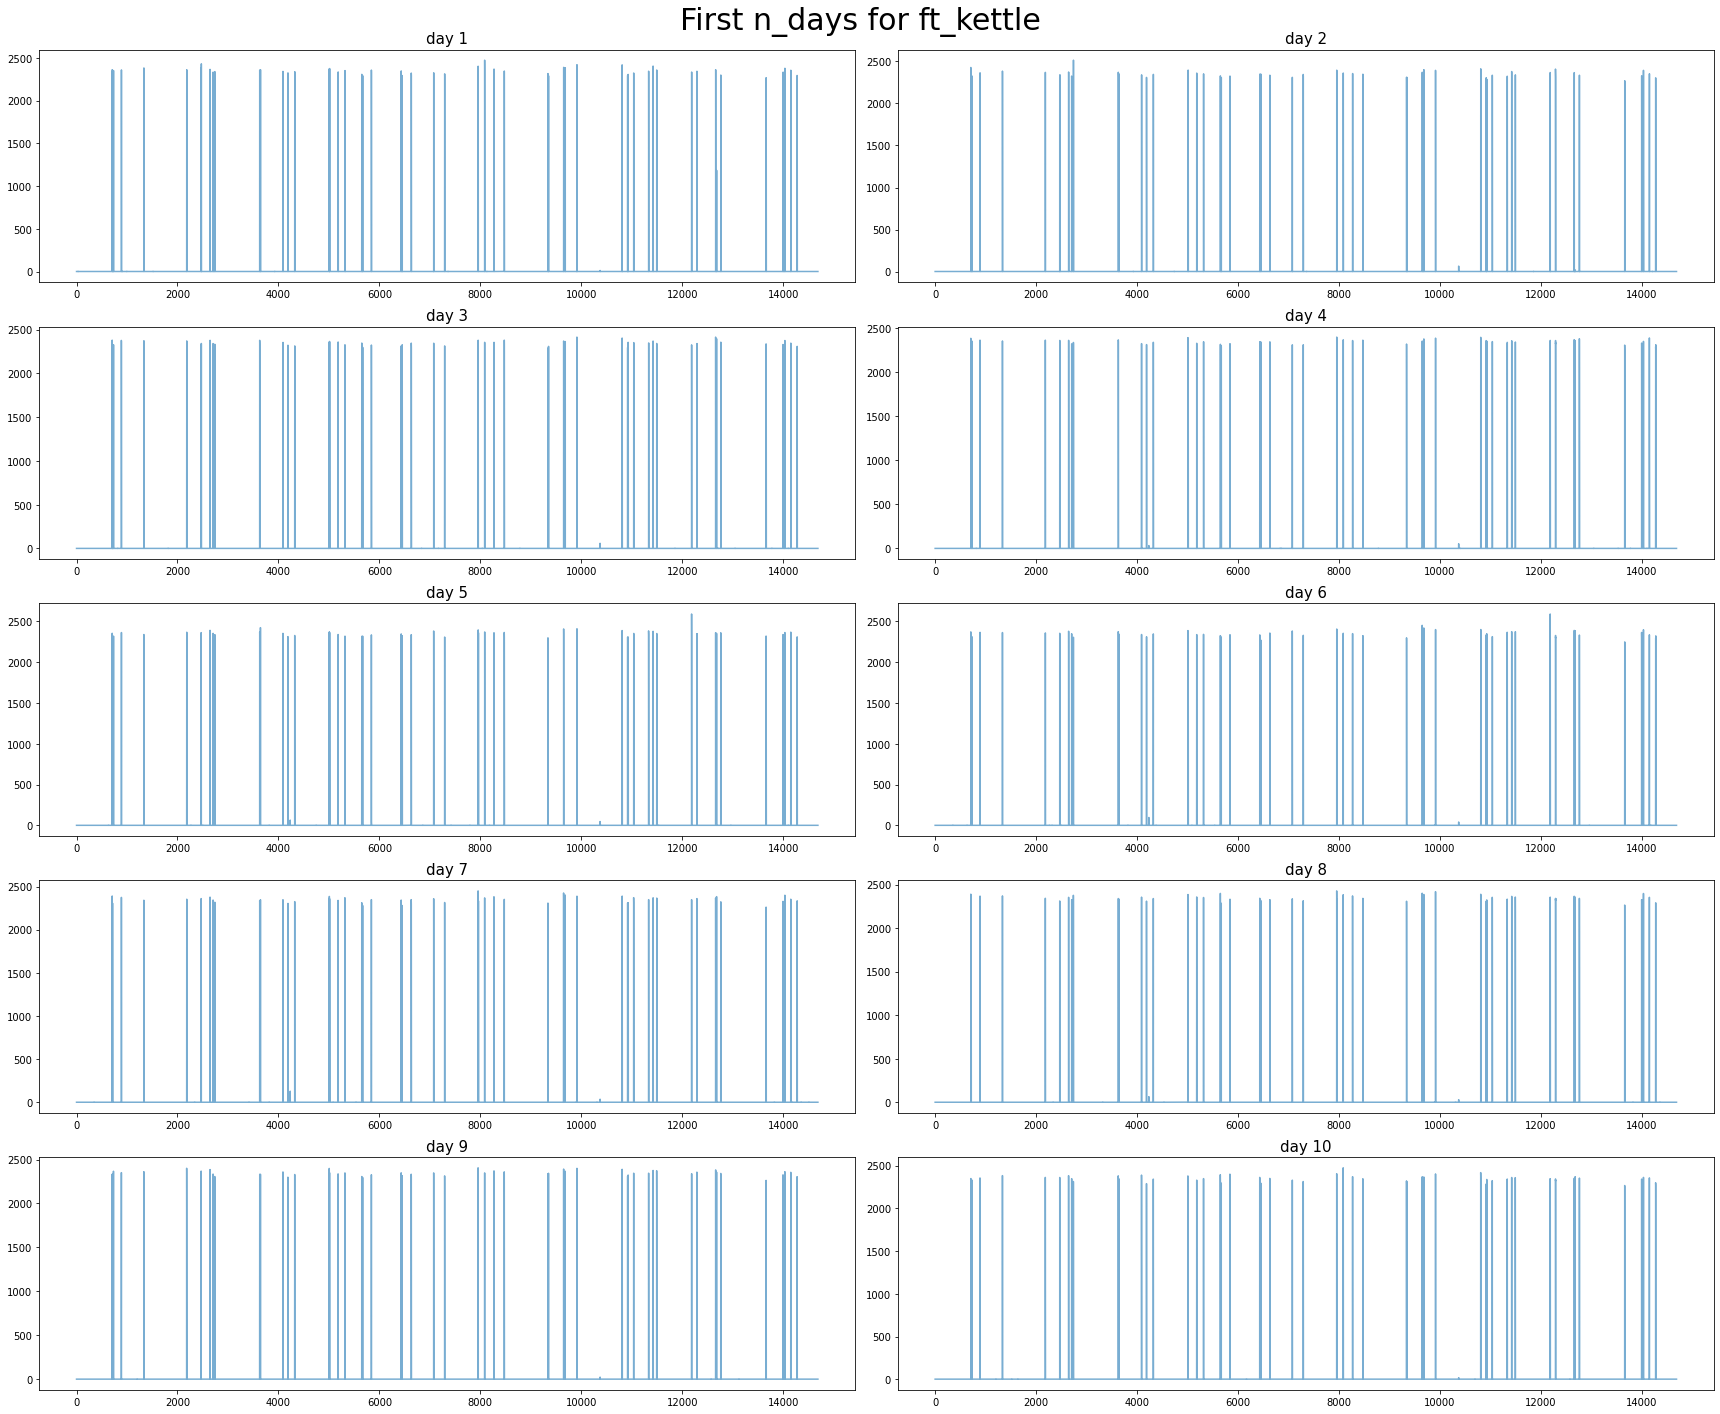

In [18]:
plot_ft_days(ref_chunk_df, 'ft_kettle', 10)

In [40]:
# Separate house 1 data into train, validation and test data
n_days = len(dates[house])
n_bins = 1
train_index = math.ceil(n_days *0.5)
test_index = math.ceil(n_days *0.8)
df1_train = ref_chunk_df.loc[:dates[1][train_index]]
df1_val = ref_chunk_df.loc[dates[1][train_index]:dates[1][test_index]]
df1_test = ref_chunk_df.loc[dates[1][test_index]:]
print('df_train.shape: ', df1_train.shape)
print('df_val.shape: ', df1_val.shape)
print('df_test.shape: ', df1_test.shape)

df_train.shape:  (4510100, 29)
df_val.shape:  (2721600, 29)
df_test.shape:  (1797100, 29)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError


from timeit import default_timer as timer

class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

def compile_model(feature, n_bins = 1, epochs = 100):
#     model = Sequential()
#     model.add(Conv1D(16, 4, activation="linear", input_shape=(1,1), padding="same", strides=1))
#     model.add(Bidirectional(LSTM(128, return_sequences=True, stateful=False), merge_mode='concat'))
#     model.add(Bidirectional(LSTM(256, return_sequences=False, stateful=False), merge_mode='concat'))
#     model.add(Dense(128, activation='tanh'))
#     model.add(Dense(1, activation='linear'))
    
#     model.summary()
    x_train = df1_train[['mains_active']].values
    x_val = df1_val[['mains_active']].values

    y_train = df1_train[[feature]].values
    y_val = df1_val[[feature]].values

    print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

    y_train_reshaped = y_train.reshape(-1, n_bins)
    y_val_reshaped = y_val.reshape(-1, n_bins)
    x_train_reshaped = x_train.reshape(-1, n_bins, 1)
    x_val_reshaped = x_val.reshape(-1, n_bins, 1)

    print(f'n_bins {n_bins}')
    print(f'epochs {epochs}')
    print(f'Input initial shape {x_train.shape}; input final shape {x_train_reshaped.shape}')
#     x_train_reshaped = x_train.reshape(x_train.shape[0], 1, 1)
#     x_val_reshaped = x_val.reshape(x_val.shape[0], 1, 1)
#     x_test_reshaped = x_test.reshape(x_test.shape[0], 1, 1)

    model = Sequential()
    model.add(Conv1D(16, 4, activation="linear", padding="same", strides=1))
    model.add(Bidirectional(LSTM(128, return_sequences=True, stateful=False), merge_mode='concat'))
    model.add(Bidirectional(LSTM(256, return_sequences=False, stateful=False), merge_mode='concat'))
    model.add(Dense(128, activation='tanh'))
    model.add(Dense(n_bins, activation='linear'))

    optimizer = Adam(lr=0.01)
    model.compile(loss='mse', optimizer=optimizer,metrics=['accuracy', RootMeanSquaredError(), MeanAbsoluteError()])
    time_cb = TimingCallback()
    callbacks = [time_cb]
    
#     model.summary()

    history = model.fit(x_train_reshaped, y_train_reshaped, epochs=epochs, batch_size=1000, validation_data=(x_val_reshaped, y_val_reshaped), callbacks=callbacks)

    return model, history, sum(time_cb.logs)

In [47]:
def view_model_results(model, history):
    fig = plt.figure()
    fig.add_subplot(1,2,1)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='test loss')
    plt.legend()
    plt.grid(True)
#     plt.xlim([0,3])
#     plt.ylim([0,1.0])
    plt.xlabel('epoch')

    fig.add_subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='test accuracy')
    plt.legend()
    plt.grid(True)
    plt.xlim([0,3])
    plt.ylim([0,1.0])
    plt.xlabel('epoch')


    print(history.history.keys())

def train_and_present_results(feature, epochs = 20):
    model, history, time_spent = compile_model(feature, n_bins = 1, epochs = epochs)
    print('Time spent', time_spent)
    view_model_results(model, history)
    
    return model

(4510100, 1) (4510100, 1) (2721600, 1) (2721600, 1) (1797100, 1) (1797100, 1)
n_bins 1
epochs 20
Input initial shape (4510100, 1); input final shape (4510100, 1, 1)
Epoch 1/20
4511/4511 [==============================] - 67s 13ms/step - loss: 28474.0273 - accuracy: 0.9835 - root_mean_squared_error: 168.7425 - mean_absolute_error: 24.6549 - val_loss: 29626.9531 - val_accuracy: 0.9900 - val_root_mean_squared_error: 172.1248 - val_mean_absolute_error: 25.5933
Epoch 2/20
4511/4511 [==============================] - 60s 13ms/step - loss: 28473.2207 - accuracy: 0.9843 - root_mean_squared_error: 168.7401 - mean_absolute_error: 24.6733 - val_loss: 29627.8203 - val_accuracy: 0.9900 - val_root_mean_squared_error: 172.1273 - val_mean_absolute_error: 26.1515
Epoch 3/20
4511/4511 [==============================] - 59s 13ms/step - loss: 28473.6367 - accuracy: 0.9841 - root_mean_squared_error: 168.7413 - mean_absolute_error: 24.6676 - val_loss: 29627.8086 - val_accuracy: 0.9900 - val_root_mean_square

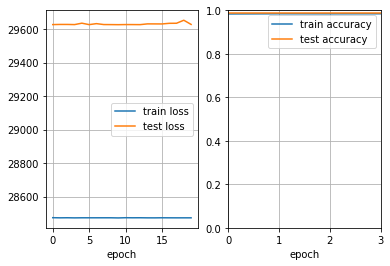

In [48]:
model = train_and_present_results('ft_kettle')

In [59]:
def predict(model, x_test):
    pred = model.predict(x_test)
    
    return pred

def plot_prediction_days(label, y_test, y_pred, n_bins=10, n_values = 10000):
    y_test_series = y_test[0: n_bins * n_values]
    y_pred_series = y_pred[0: n_bins * n_values]
    y_test_bins = y_test_series.reshape(-1, n_bins)
    y_pred_bins = y_pred_series.reshape(-1, n_bins)
    fig, axes = plt.subplots((n_bins+1)//2,2, figsize=(24, n_bins*2) )
    for i in range(y_test_bins.shape[-1]):
        y_test_series = y_test_bins[:,i]
        y_pred_series = y_pred_bins[:,i]
        # axes.flat[i].plot(y_test_series, alpha = 0.8)
        axes.flat[i].plot(y_pred_series, alpha = 0.6)
        axes.flat[i].set_title(f'day {i+1}', fontsize = '15')
    plt.suptitle(f'First n_days predictions for {label}', fontsize = '30')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

In [53]:
x_test = df1_test[['mains_active']].values
y_test = df1_test[['ft_kettle']].values
x_test_reshaped = x_test.reshape(-1, n_bins, 1)
y_test_reshaped = y_test.reshape(-1, n_bins)

In [54]:
pred = predict(model, x_test_reshaped)

56160/56160 [==============================] - 211s 4ms/step


(1797100, 1, 1)
(1797100, 1)
(1797100, 1)


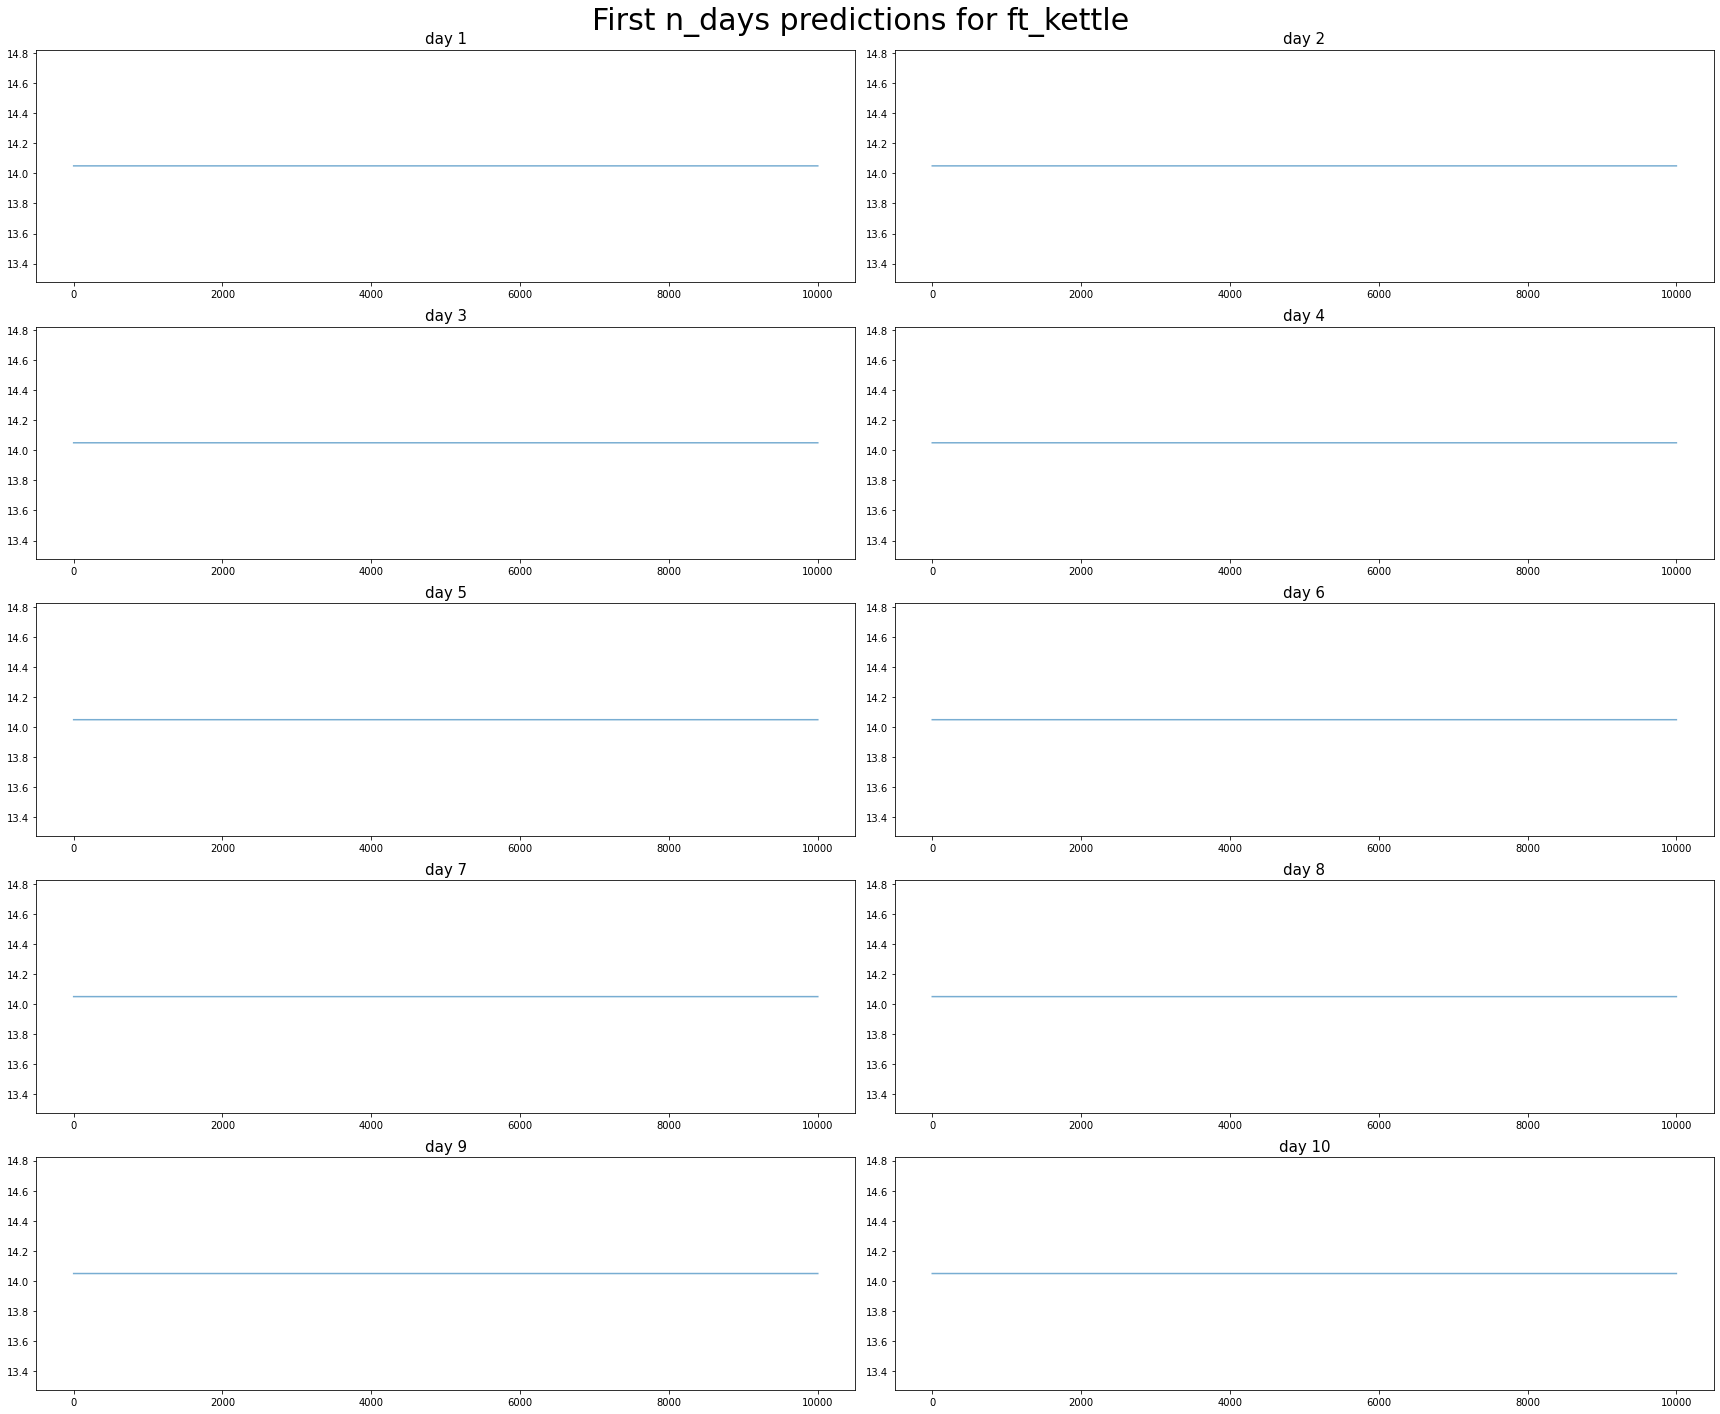

In [60]:
print(x_test_reshaped.shape)
print(pred.shape)
print(y_test_reshaped.shape)
y_test_reshaped = y_test.reshape(-1, n_bins)
plot_prediction_days('ft_kettle', y_test_reshaped, pred)

In [ ]:
# train_and_present_results('ft_fridge')

In [ ]:
# train_and_present_results('ft_washing_machine')

In [ ]:
# train_and_present_results('ft_microwave')

In [ ]:
# train_and_present_results('ft_dishwasher')